Student Name: Aidan Keeshan
Student ID:   18200117

- The 'as' keyword allows you to invoke functionality from the module using an alias for the module name. For example: np.mean() instead of numpy.mean()
- The from keyword allows you to only import the functionality of interest, for example above we import only the PCA class from the sklearn.decomposition module

In [1]:
import numpy as np
import random as rand
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.decomposition import PCA

As per E-tivity instructions: Use of the matrix class is discouraged, but to allow us to simplify the code slightly, we will use it this week. Its first use will be to store the data that you will perform the PCA transform on. Note that you will likely obtain a higher score if your final version does not use the matrix class.

In [2]:
a_x = 0.05
a_y= 10

In [80]:
data =  np.matrix([[n*(1+a_x*(rand.random()-0.5)),4*n+ a_y*(rand.random()-0.5)] for n in range(20)])

The numpy shape property is very useful to get an insight in the dimensions of your data, for example to check whether the features (in this case 2) or the samples (in this case 20) are in the rows or the columns. The notation used here (with columns containing the features and rows containing separate examples) is the standard for Scikitlearn and many other machine learning algorithms.


In [4]:
data.shape

(20, 2)

In [5]:
print(pca.components_)

[[ 0.24572337  0.96933999]
 [ 0.96933999 -0.24572337]]


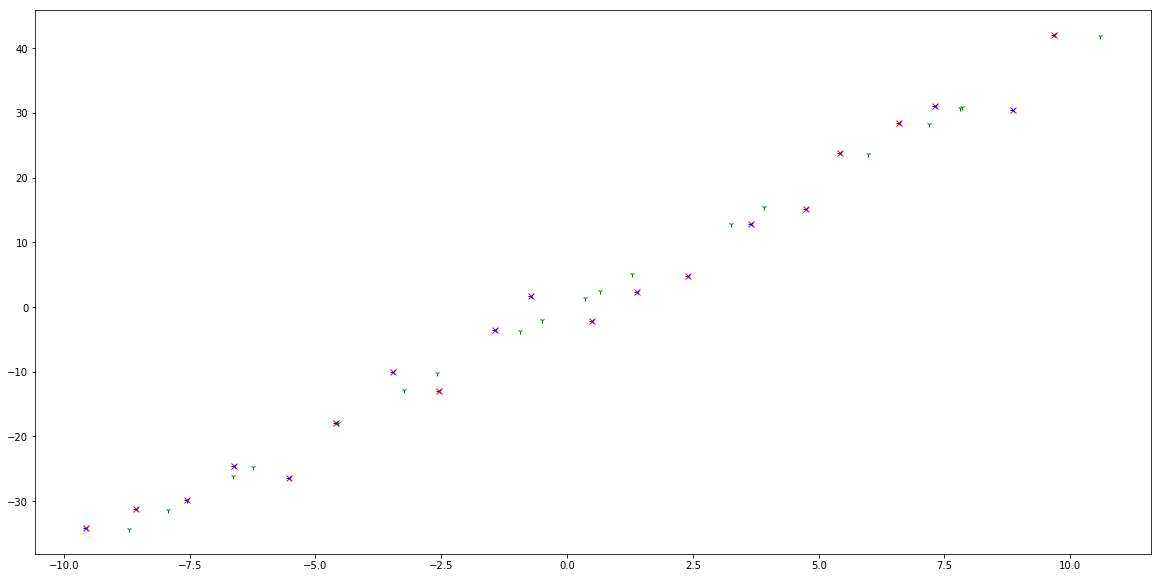

In [20]:
def pca_n(n):
    pca = PCA(n_components=n)
    pca.fit(data)
    data_pca = pca.transform(data)
    data_reduced = pca.inverse_transform(data_pca)
    return data_reduced

pca_n1 = pca_n(1)
pca_n2 = pca_n(2)
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(data[:,0], data[:,1], 'xr')
plt.plot(pca_n1[:,0], pca_n1[:,1],"1g")
plt.plot(pca_n2[:,0], pca_n2[:,1],"3b")
plt.show()

In [34]:
data

matrix([[ -9.56040214, -34.09218253],
        [ -8.55803181, -31.14197406],
        [ -7.54281481, -29.79759919],
        [ -6.61350661, -24.54778369],
        [ -5.52670007, -26.45557182],
        [ -4.58402208, -17.97276991],
        [ -3.46685699, -10.00435204],
        [ -2.5369277 , -12.92526132],
        [ -1.42450311,  -3.58371408],
        [ -0.71006695,   1.64667324],
        [  0.49828064,  -2.20797362],
        [  1.39070489,   2.3652407 ],
        [  2.39474968,   4.83818206],
        [  3.64556742,  12.75858601],
        [  4.74719944,  15.22315508],
        [  5.41428072,  23.76130605],
        [  6.60325376,  28.49923851],
        [  7.30335073,  31.06551344],
        [  8.85682665,  30.52205231],
        [  9.66961832,  42.04923486]])

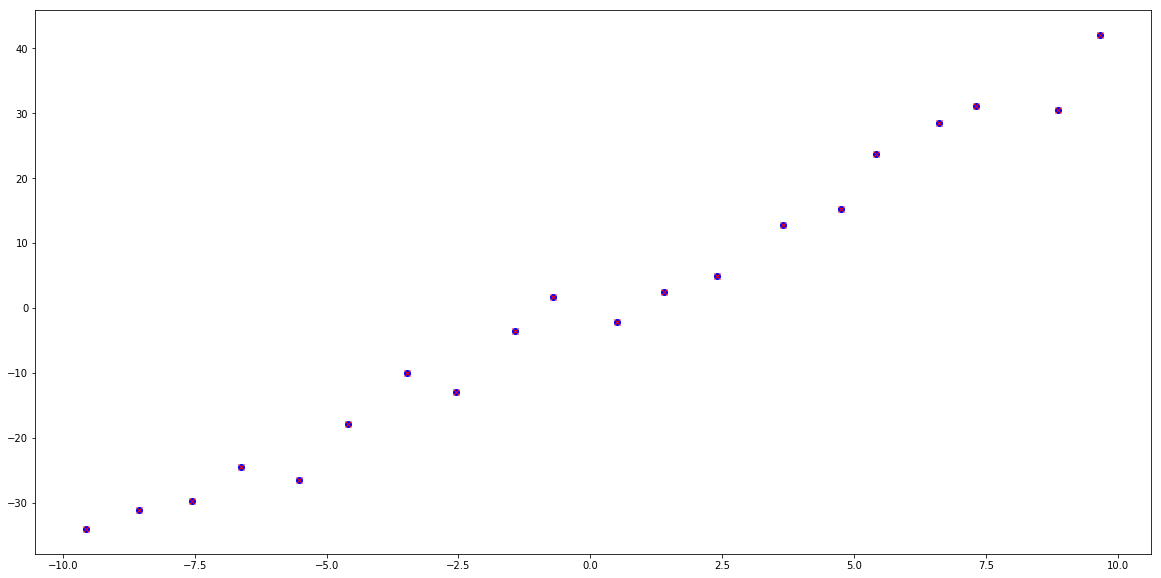

In [35]:
# Step 1: Get mean of x,y of data
axis_mean = np.mean(data, axis=0)
# Step 2: Subtract Mean to adjust data
data_adj = np.subtract(data,axis_mean)
plt.plot(data[:,0], data[:,1], 'ob')
plt.plot(data_adj[:,0], data_adj[:,1], 'xr')
plt.show()

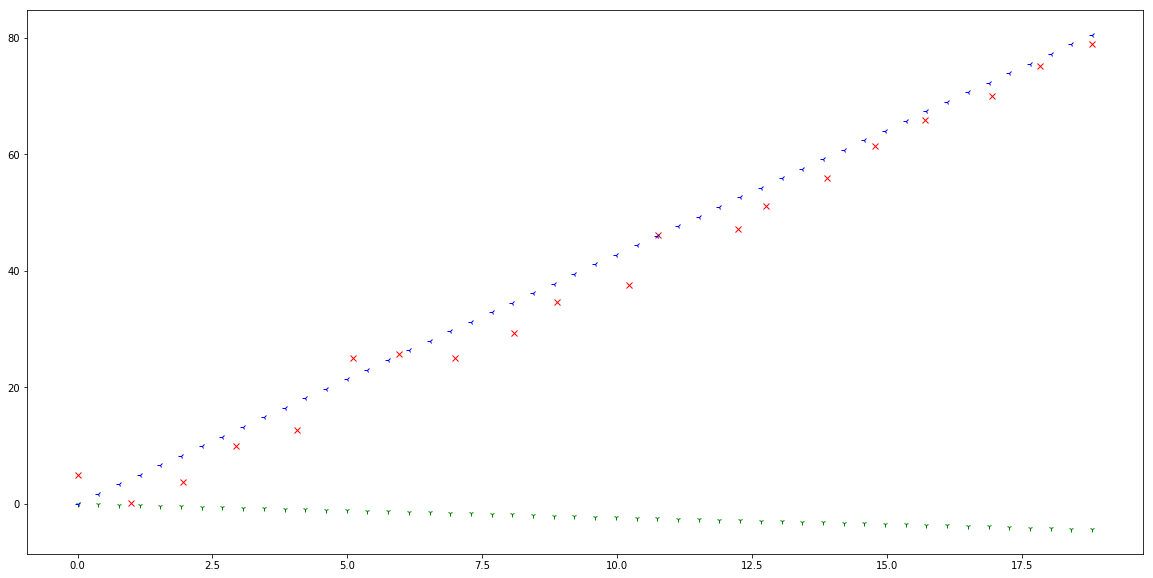

In [85]:
# Step 3 Calcaulte Covariance Matrix
covariance_matrix = np.cov(data, rowvar=False)
# Step 3 Calcaulte eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
def eigen_plt(dimension):
    slope = eigenvectors[dimension][1]/eigenvectors[dimension][0]
    x = np.linspace(np.min(data[:,0]), np.max(data[:,0]), 50)
    y = slope * (x)
    return x,y

#np.min(data[:,0])
x1,y1 = eigen_plt(0)
x2,y2 = eigen_plt(1)
plt.rcParams["figure.figsize"] = (20,10)
plt.plot(data[:,0], data[:,1], 'xr')
plt.plot(x1, y1,"1g")
plt.plot(x2, y2,"3b")
plt.show()

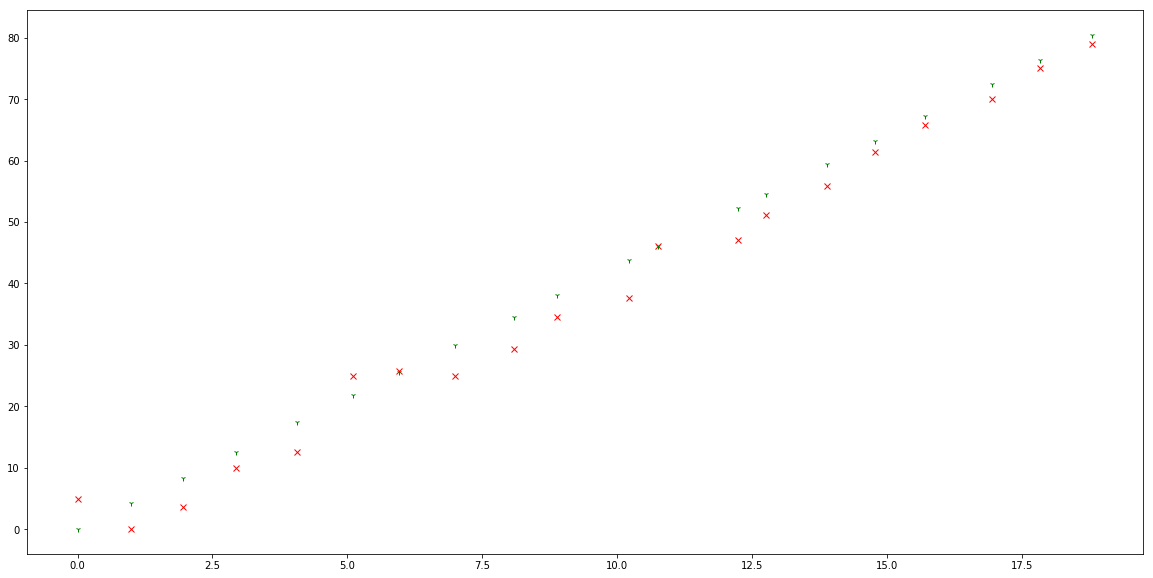

In [86]:
# Step 3 Calcaulte Covariance Matrix
covariance_matrix = np.cov(data, rowvar=False)
# Step 3 Calcaulte eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
slope1 = eigenvectors[0][1]/eigenvectors[0][0]
slope2 = eigenvectors[1][1]/eigenvectors[1][0]
t1 = np.array(data, copy=True)  
t2 = np.array(data, copy=True)  
t1[:,1] = t1[:,0]*slope1
t2[:,1] = t2[:,0]*slope2
#y2 = x*slope2
var1 = np.var(t1)
var2 = np.var(t2)
data_fit = t1
if var1 < var2:
    data_fit = t2

plt.rcParams["figure.figsize"] = (20,10)
plt.plot(data[:,0], data[:,1], 'xr')
plt.plot(data_fit[:,0], data_fit[:,1],"1g")
plt.show()